In [175]:
import pandas as pd
import numpy as np
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Palm Oil: Debunking Myths and Exploring Solutions

## Introduction

With the emergence of more and more palm oil-free products, it seems that palm oil is almost a thing of the past. Spurred on by horror stories of orangutans without trees and burning trees giving way to rows of oil palm trees, more and more people are opting for these products. This seems a very reasonable choice. However, it could be that the solution to this problem takes a more counter-intuitive approach: choose palm oil instead.

Using various charts, we will try to present relevant data in as clear a way as possible, so that you can learn more about these two sides of the discussion and make your own choice on which option is best.

In this analysis, we will concentrate exclusively on Malaysia and Indonesia, as these two countries are the predominant producers of palm oil globally. Together, they account for nearly 85% of the world's palm oil supply, making them the most significant players in the industry.

In [176]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('../Datasets/palm-oil-production.csv')

# Filter data for the year 2021
df_2021 = df.loc[df['Year'] == 2021]

# Sort by production to get the top 6 entries
df_2021_top6 = df_2021.sort_values(by='Production', ascending=False).head(6)

# Plot a bar chart
fig = px.bar(df_2021_top6, 
             x='Entity', 
             y='Production', 
             title='Top 6 Palm Oil Producers in 2021', 
             labels={'Production': 'Production in tonnes', 'Entity': 'Country'},
             template='plotly_white')

# Show the plot
fig.show()
#

## Perspective 1: We pust stop the production of palm Oil

- It leads to deforestation

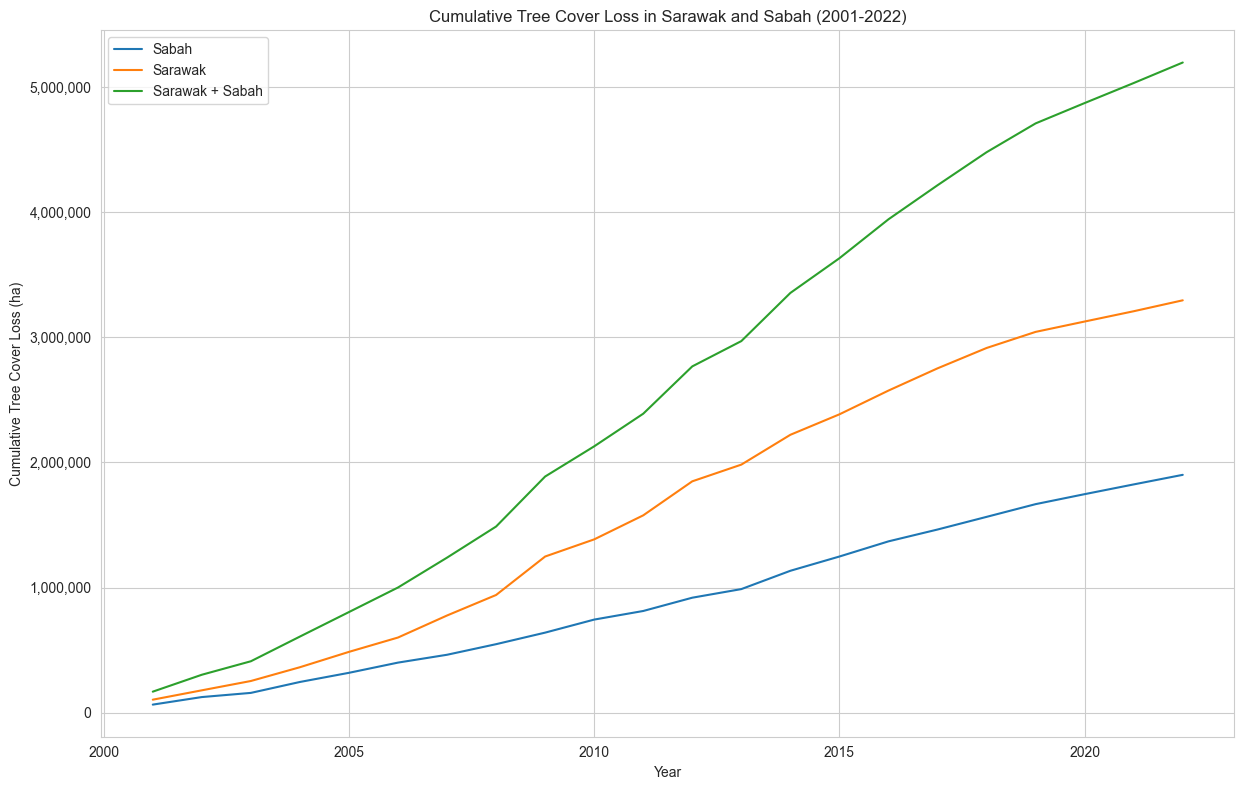

In [177]:
# Load the dataset
df = pd.read_csv('../Datasets/Deforestation/Subnational 1 tree cover loss.csv')

# Define the years to plot
years = [f'tc_loss_ha_{year}' for year in range(2001, 2023)]

# List of provinces in Kalimantan (this is East Malaysia, not Kalimantan)
provinces = ['Sarawak', 'Sabah',]

plt.figure(figsize=(12, 8))

# province_df = df[(df['subnational1'].isin(provinces)) & (df['threshold'] == 0)]
# columns_to_keep = ['subnational1'] + years
# province_df = province_df[columns_to_keep]
# province_df_long = province_df.melt(id_vars='subnational1', var_name='year', value_name='tc_loss_ha')
# province_df_long['year'] = province_df_long['year'].str.extract(r'(\d+)').astype(int)
# province_df_long['cumulative_tc_loss_ha'] = province_df_long['tc_loss_ha'].cumsum()
# province_df_long = province_df_long.sort_values(by='year')

province_dfs = dict.fromkeys(provinces)

# Loop through each province
for province in provinces:
    # Filter the DataFrame for the current province and threshold == 0
    province_dfs[province] = df[(df['subnational1'] == province) & (df['threshold'] == 0)]
    
    # Keep only relevant columns
    columns_to_keep = ['subnational1'] + years
    province_dfs[province] = province_dfs[province][columns_to_keep]
    
    # Melt the DataFrame to long format
    province_dfs[province] = province_dfs[province].melt(id_vars='subnational1', var_name='year', value_name='tc_loss_ha')
    
    # Extract year from the column name and convert to integer
    province_dfs[province]['year'] = province_dfs[province]['year'].str.extract(r'(\d+)').astype(int)
    
    # Sort the DataFrame by year
    province_dfs[province] = province_dfs[province].sort_values(by='year')
    
    # Calculate cumulative tree loss
    province_dfs[province]['cumulative_tc_loss_ha'] = province_dfs[province]['tc_loss_ha'].cumsum()
    
    # Plot the cumulative tree loss for the current province
    # plt.plot(province_dfs[province]['year'], province_dfs[province]['cumulative_tc_loss_ha'], marker='o', label=province)

# Combine Sarawak and Sabah into East Malaysia
province_dfs['East Malaysia'] = pd.DataFrame()
province_dfs['East Malaysia']['year'] = province_dfs['Sabah']['year']
province_dfs['East Malaysia'].insert(0,'subnational1', 'Sarawak + Sabah')
province_dfs['East Malaysia']['tc_loss_ha'] = province_dfs['Sarawak']['tc_loss_ha'] + province_dfs['Sabah']['tc_loss_ha']
province_dfs['East Malaysia']['cumulative_tc_loss_ha'] = province_dfs['Sarawak']['cumulative_tc_loss_ha'] + province_dfs['Sabah']['cumulative_tc_loss_ha']
# plt.plot(province_dfs['East Malaysia']['year'], province_dfs['East Malaysia']['cumulative_tc_loss_ha'], marker='o', label='East Malaysia')

combined_df = pd.concat(province_dfs.values()).reset_index(drop=True)
combined_df.set_index('year', inplace=True)
combined_df.groupby('subnational1')['cumulative_tc_loss_ha'].plot()

# Plot settings
plt.title('Cumulative Tree Cover Loss in Sarawak and Sabah (2001-2022)')
plt.xlabel('Year')
plt.ylabel('Cumulative Tree Cover Loss (ha)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Set the y-axis to display numbers in plain format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


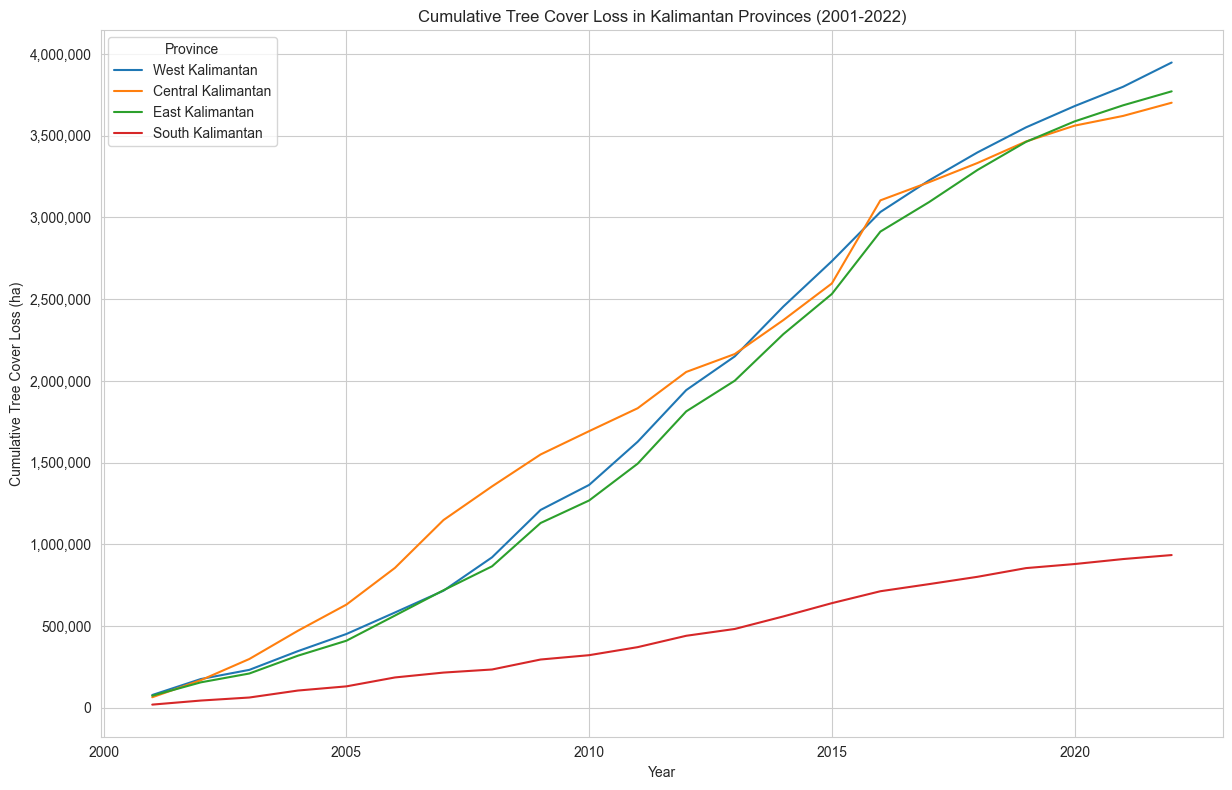

In [178]:
# Load the dataset
# De dataset mist de provincie Kalimantan Utara, dus deze is niet meegenomen in de plot
df = pd.read_csv('../Datasets/Deforestation/Subnational 1 tree cover loss.csv')

# Define the years to plot
years = [f'tc_loss_ha_{year}' for year in range(2001, 2023)]

# Mapping dictionary from Indonesian to English names
province_mapping = {
    'Kalimantan Barat': 'West Kalimantan',
    'Kalimantan Tengah': 'Central Kalimantan',
    'Kalimantan Timur': 'East Kalimantan',
    'Kalimantan Selatan': 'South Kalimantan'
}

plt.figure(figsize=(12, 8))

# Loop through each province
for province_id, (province_indo, province_eng) in enumerate(province_mapping.items(), start=1):
    # Filter the DataFrame for the current province and threshold == 0
    province_df = df[(df['subnational1'] == province_indo) & (df['threshold'] == 0)]
    
    # Keep only relevant columns
    columns_to_keep = ['subnational1'] + years
    province_df = province_df[columns_to_keep]
    
    # Melt the DataFrame to long format
    province_df_long = province_df.melt(id_vars='subnational1', var_name='year', value_name='tc_loss_ha')
    
    # Extract year from the column name and convert to integer
    province_df_long['year'] = province_df_long['year'].str.extract(r'(\d+)').astype(int)
    
    # Sort the DataFrame by year
    province_df_long = province_df_long.sort_values(by='year')
    
    # Calculate cumulative tree loss
    province_df_long['cumulative_tc_loss_ha'] = province_df_long['tc_loss_ha'].cumsum()
    
    # Plot the cumulative tree loss for the current province
    plt.plot(province_df_long['year'], province_df_long['cumulative_tc_loss_ha'], label=province_eng)

# Plot settings
plt.title('Cumulative Tree Cover Loss in Kalimantan Provinces (2001-2022)')
plt.xlabel('Year')
plt.ylabel('Cumulative Tree Cover Loss (ha)')
plt.legend(title='Province', loc='upper left')
plt.grid(True)
plt.tight_layout()

# Set the y-axis to display numbers in plain format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


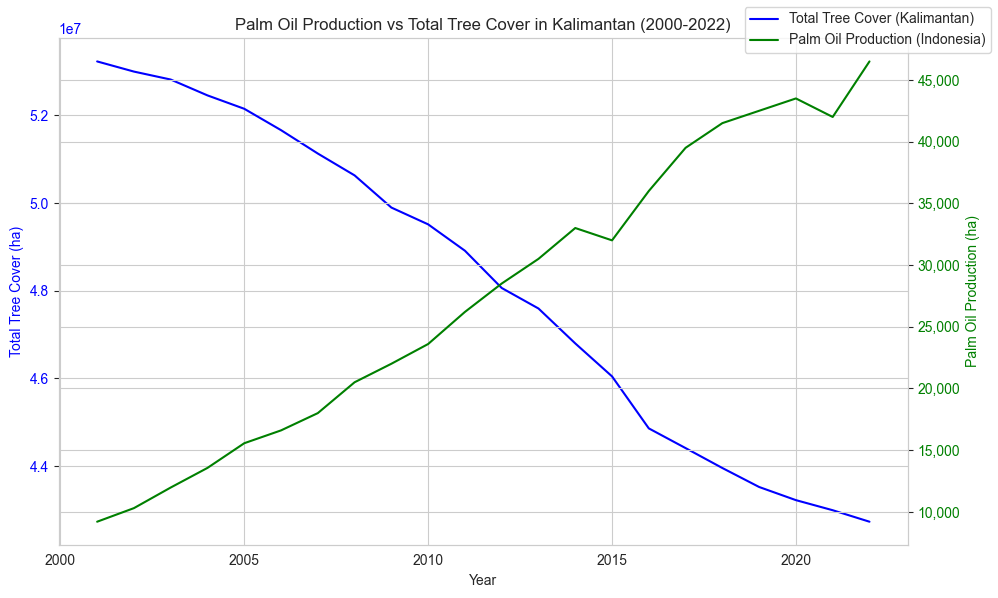

In [179]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

# Load palm oil production data
palm = pd.read_csv('../Datasets/Oils/archive/cleaned/palm.csv')

# Filter data for Indonesia and years >= 2000
df_Indo = palm[(palm['Country'] == 'Indonesia') & (palm['Year'] >= 2000)]

# Extract production values and years
xi = df_Indo['Production'].values
years_palm = df_Indo['Year'].values

# Load the dataset for Kalimantan forest cover
df = pd.read_csv('../Datasets/Deforestation/Subnational 1 tree cover loss.csv')

# Filter for Kalimantan provinces and threshold == 0
provinces = ['Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Selatan']
kalimantan_df = df[(df['subnational1'].isin(provinces)) & (df['threshold'] == 0)]

# Calculate initial tree cover in 2000
initial_extent_2000 = kalimantan_df['extent_2000_ha'].sum()

# Calculate tree cover gain spread over 22 years
gain_spread = (kalimantan_df['gain_2000-2020_ha'].sum() / 22)

# Calculate cumulative tree cover losses from 2001 to 2022
years_tree_cover = range(2001, 2023)
cumulative_losses = []
for year in years_tree_cover:
    loss_column = f'tc_loss_ha_{year}'
    cumulative_loss = (kalimantan_df[loss_column].sum() - gain_spread)
    cumulative_losses.append(cumulative_loss)

# Calculate total tree cover per year
annual_tree_cover = []
for i, year in enumerate(years_tree_cover):
    total_tree_cover = initial_extent_2000 - sum(cumulative_losses[:i + 1])
    annual_tree_cover.append(total_tree_cover)

# Interpolate palm oil production to match the years_tree_cover
interp_func = interpolate.interp1d(years_palm, xi, kind='linear', fill_value='extrapolate')
xi_interpolated = interp_func(years_tree_cover)

# Plotting with twin y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total tree cover in Kalimantan on primary y-axis (left)
ax1.plot(years_tree_cover, annual_tree_cover, linestyle='-', color='b', label='Total Tree Cover (Kalimantan)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Tree Cover (ha)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a twin y-axis (right) for palm oil production
ax2 = ax1.twinx()
ax2.plot(years_tree_cover, xi_interpolated, linestyle='-', color='g', label='Palm Oil Production (Indonesia)')
ax2.set_ylabel('Palm Oil Production (ha)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set the y-axis on the right side (ax2) to display numbers in plain format without scientific notation
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Set title and legends
plt.title('Palm Oil Production vs Total Tree Cover in Kalimantan (2000-2022)')
fig.tight_layout()
fig.legend(loc='upper right')

plt.show()


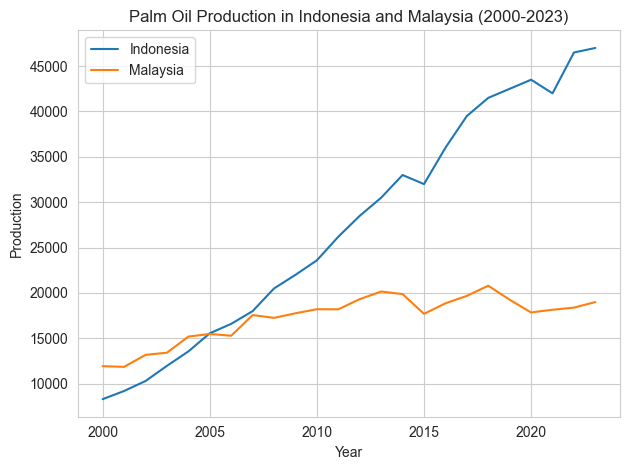

In [180]:
import matplotlib.pyplot as plt
import pandas as pd

# Load palm oil production data
palm = pd.read_csv('../Datasets/Oils/archive/cleaned/palm.csv')

# Filter data for Indonesia and Malaysia and years >= 2000
df_Indo = palm[(palm['Country'] == 'Indonesia') & (palm['Year'] >= 2000)]
df_Malaysia = palm[(palm['Country'] == 'Malaysia') & (palm['Year'] >= 2000)]

# Extract production values and years
xi = df_Indo['Production'].values
xm = df_Malaysia['Production'].values
years = df_Indo['Year'].values  # Both Indo and Malaysia have the same years


# Plotting
plt.plot(years, xi, label='Indonesia')
plt.plot(years, xm, label='Malaysia')

# Plot settings
plt.title('Palm Oil Production in Indonesia and Malaysia (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [181]:
import pandas as pd

# Load palm oil production data
palm = pd.read_csv('../Datasets/Oils/archive/cleaned/palm.csv')

# Filter data for Indonesia and years >= 2000
df_Indo = palm[(palm['Country'] == 'Indonesia') & (palm['Year'] >= 2000)]

# Extract production values
xi = df_Indo['Production'].values

# Load the dataset for Kalimantan forest cover
df = pd.read_csv('../Datasets/Deforestation/Subnational 1 tree cover loss.csv')

# Filter for Kalimantan provinces and threshold == 0
provinces = ['Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Selatan']
kalimantan_df = df[(df['subnational1'].isin(provinces)) & (df['threshold'] == 0)]

# Calculate initial tree cover in 2000
initial_extent_2000 = kalimantan_df['extent_2000_ha'].sum()

# Calculate tree cover gain spread over 22 years
gain_spread = (kalimantan_df['gain_2000-2020_ha'].sum() / 22)

# Calculate cumulative tree cover losses from 2001 to 2022
years = range(2001, 2023)
cumulative_losses = []
for year in years:
    loss_column = f'tc_loss_ha_{year}'
    cumulative_loss = (kalimantan_df[loss_column].sum() - gain_spread)
    cumulative_losses.append(cumulative_loss)

# Calculate total tree cover per year
annual_tree_cover = []
for i, year in enumerate(years):
    total_tree_cover = initial_extent_2000 - sum(cumulative_losses[:i + 1])
    annual_tree_cover.append(total_tree_cover)

# Calculate correlation between palm oil production and annual tree cover
correlation = pd.Series(xi).corr(pd.Series(annual_tree_cover))

print(f"Correlation between Palm Oil Production in Indonesia and Total Tree Cover in Kalimantan: {correlation:.2f}")


Correlation between Palm Oil Production in Indonesia and Total Tree Cover in Kalimantan: -0.99


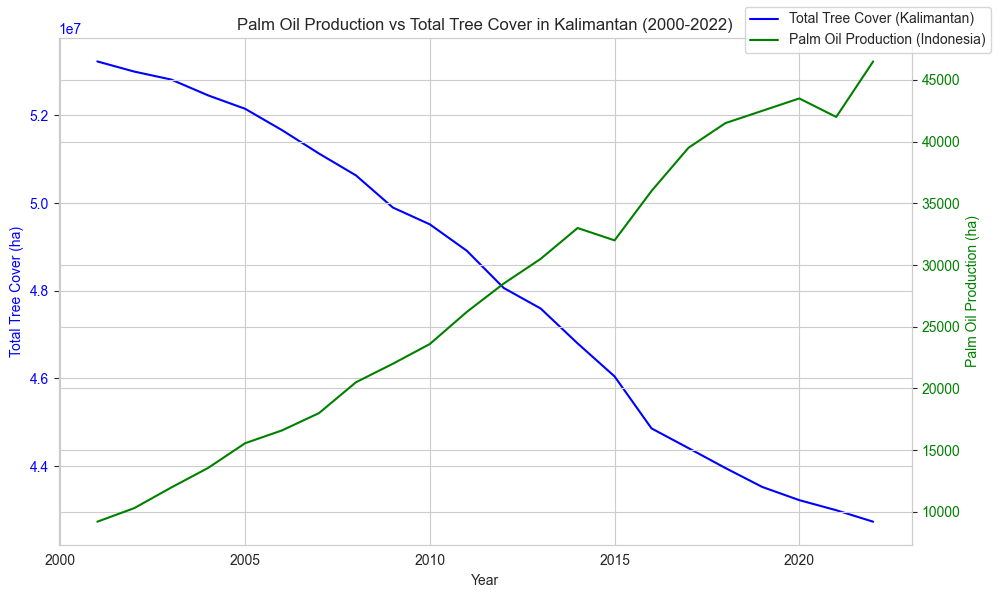

In [182]:
import matplotlib.pyplot as plt
import pandas as pd

# Load palm oil production data
palm = pd.read_csv('../Datasets/Oils/archive/cleaned/palm.csv')

# Filter data for Indonesia and years >= 2000
df_Indo = palm[(palm['Country'] == 'Indonesia') & (palm['Year'] >= 2000)]

# Extract production values and years
xi = df_Indo['Production'].values
years_palm = df_Indo['Year'].values

# Load the dataset for Kalimantan forest cover
df = pd.read_csv('../Datasets/Deforestation/Subnational 1 tree cover loss.csv')

# Filter for Kalimantan provinces and threshold == 0
provinces = ['Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Selatan']
kalimantan_df = df[(df['subnational1'].isin(provinces)) & (df['threshold'] == 0)]

# Calculate initial tree cover in 2000
initial_extent_2000 = kalimantan_df['extent_2000_ha'].sum()

# Calculate tree cover gain spread over 22 years
gain_spread = (kalimantan_df['gain_2000-2020_ha'].sum() / 22)

# Calculate cumulative tree cover losses from 2001 to 2022
years_tree_cover = range(2001, 2023)
cumulative_losses = []
for year in years_tree_cover:
    loss_column = f'tc_loss_ha_{year}'
    cumulative_loss = (kalimantan_df[loss_column].sum() - gain_spread)
    cumulative_losses.append(cumulative_loss)

# Calculate total tree cover per year
annual_tree_cover = []
for i, year in enumerate(years_tree_cover):
    total_tree_cover = initial_extent_2000 - sum(cumulative_losses[:i + 1])
    annual_tree_cover.append(total_tree_cover)

# Interpolate palm oil production to match the years_tree_cover
from scipy import interpolate

interp_func = interpolate.interp1d(years_palm, xi, kind='linear', fill_value='extrapolate')
xi_interpolated = interp_func(years_tree_cover)

# Plotting with twin y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total tree cover in Kalimantan on primary y-axis (left)
ax1.plot(years_tree_cover, annual_tree_cover, linestyle='-', color='b', label='Total Tree Cover (Kalimantan)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Tree Cover (ha)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a twin y-axis (right) for palm oil production
ax2 = ax1.twinx()
ax2.plot(years_tree_cover, xi_interpolated, linestyle='-', color='g', label='Palm Oil Production (Indonesia)')
ax2.set_ylabel('Palm Oil Production (ha)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set title and legends
plt.title('Palm Oil Production vs Total Tree Cover in Kalimantan (2000-2022)')
fig.tight_layout()
fig.legend(loc='upper right')



plt.show()


In [183]:
import pandas as pd
import plotly.graph_objs as go

# Load the dataset
df = pd.read_csv('../Datasets/Deforestation/Subnational 1 tree cover loss.csv')

# Define the years to plot
years = [f'tc_loss_ha_{year}' for year in range(2001, 2023)]

# Mapping dictionary from Indonesian to English names for Kalimantan provinces
province_mapping = {
    'Kalimantan Barat': 'West Kalimantan',
    'Kalimantan Tengah': 'Central Kalimantan',
    'Kalimantan Timur': 'East Kalimantan',
    'Kalimantan Selatan': 'South Kalimantan'
}

# Create an empty DataFrame to store totals
totals_df = pd.DataFrame(columns=['year', 'cumulative_tc_loss_ha'])

# Loop through each province
for province_indo, province_eng in province_mapping.items():
    # Filter the DataFrame for the current province and threshold == 0
    province_df = df[(df['subnational1'] == province_indo) & (df['threshold'] == 0)]
    
    # Keep only relevant columns
    columns_to_keep = ['subnational1'] + years
    province_df = province_df[columns_to_keep]
    
    # Melt the DataFrame to long format
    province_df_long = province_df.melt(id_vars='subnational1', var_name='year', value_name='tc_loss_ha')
    
    # Extract year from the column name and convert to integer
    province_df_long['year'] = province_df_long['year'].str.extract(r'(\d+)').astype(int)
    
    # Sort the DataFrame by year
    province_df_long = province_df_long.sort_values(by='year')
    
    # Calculate cumulative tree loss
    province_df_long['cumulative_tc_loss_ha'] = province_df_long['tc_loss_ha'].cumsum()
    
    # Append to totals_df
    totals_df = pd.concat([totals_df, province_df_long[['year', 'cumulative_tc_loss_ha']]], ignore_index=True)

# Calculate the total cumulative tree loss across all provinces
totals_df = totals_df.groupby('year')['cumulative_tc_loss_ha'].sum().reset_index()

# Initialize Figure using Plotly
fig = go.Figure()

# Plot cumulative tree cover loss for Sarawak
sarawak_df = df[(df['subnational1'] == 'Sarawak') & (df['threshold'] == 0)]
sarawak_df = sarawak_df[years]
sarawak_df_long = sarawak_df.melt(var_name='year', value_name='tc_loss_ha')
sarawak_df_long['year'] = sarawak_df_long['year'].str.extract(r'(\d+)').astype(int)
sarawak_df_long = sarawak_df_long.sort_values(by='year')
sarawak_df_long['cumulative_tc_loss_ha'] = sarawak_df_long['tc_loss_ha'].cumsum()

fig.add_trace(go.Scatter(x=sarawak_df_long['year'], 
                         y=sarawak_df_long['cumulative_tc_loss_ha'], 
                         mode='lines+markers', 
                         name='Sarawak'))

# Plot cumulative tree cover loss for Sabah
sabah_df = df[(df['subnational1'] == 'Sabah') & (df['threshold'] == 0)]
sabah_df = sabah_df[years]
sabah_df_long = sabah_df.melt(var_name='year', value_name='tc_loss_ha')
sabah_df_long['year'] = sabah_df_long['year'].str.extract(r'(\d+)').astype(int)
sabah_df_long = sabah_df_long.sort_values(by='year')
sabah_df_long['cumulative_tc_loss_ha'] = sabah_df_long['tc_loss_ha'].cumsum()

fig.add_trace(go.Scatter(x=sabah_df_long['year'], 
                         y=sabah_df_long['cumulative_tc_loss_ha'], 
                         mode='lines+markers', 
                         name='Sabah'))

# Combine Sarawak and Sabah into 'East Malaysia'
east_malaysia_df = pd.DataFrame()
east_malaysia_df['year'] = sarawak_df_long['year']
east_malaysia_df['tc_loss_ha'] = sarawak_df_long['tc_loss_ha'] + sabah_df_long['tc_loss_ha']
east_malaysia_df['cumulative_tc_loss_ha'] = sarawak_df_long['cumulative_tc_loss_ha'] + sabah_df_long['cumulative_tc_loss_ha']

fig.add_trace(go.Scatter(x=east_malaysia_df['year'], 
                         y=east_malaysia_df['cumulative_tc_loss_ha'], 
                         mode='lines+markers', 
                         name='East Malaysia'))

# Plot cumulative tree cover loss for Kalimantan provinces
for province_indo, province_eng in province_mapping.items():
    # Filter the DataFrame for the current province and threshold == 0
    province_df = df[(df['subnational1'] == province_indo) & (df['threshold'] == 0)]
    
    # Keep only relevant columns
    province_df = province_df[years]
    
    # Melt the DataFrame to long format
    province_df_long = province_df.melt(var_name='year', value_name='tc_loss_ha')
    province_df_long['year'] = province_df_long['year'].str.extract(r'(\d+)').astype(int)
    province_df_long = province_df_long.sort_values(by='year')
    
    # Calculate cumulative tree loss
    province_df_long['cumulative_tc_loss_ha'] = province_df_long['tc_loss_ha'].cumsum()
    
    # Add trace for the current province
    fig.add_trace(go.Scatter(x=province_df_long['year'], 
                             y=province_df_long['cumulative_tc_loss_ha'], 
                             mode='lines+markers', 
                             name=province_eng))

# Add trace for total cumulative tree cover loss in Kalimantan
fig.add_trace(go.Scatter(x=totals_df['year'], 
                         y=totals_df['cumulative_tc_loss_ha'], 
                         mode='lines+markers', 
                         name='Total for Kalimantan'))

# Update layout
fig.update_layout(title='Cumulative tree cover loss on Borneo per country and province (2001-2022)',
                  xaxis_title='Year',
                  yaxis_title='Cumulative Tree Cover Loss (ha)',
                  legend_title='Province',
                  hovermode='x unified',
                  template='plotly_white')

# Show the plot
fig.show()


- The oxidation of the exposed peat soil emits CO2 and methane gas, both greenhouse gases, and it emits more CO2 per kg of product than other oils. (CO2 emission visualisations) 

In [195]:
import pandas as pd
import plotly.graph_objects as go

# Read the dataset
fp_raw = pd.read_csv('../Datasets/Food_Production.csv')

# List of oils
oils = [oil for oil in fp_raw['Food product'] if 'Oil' in oil]

# Sort the table
data1 = fp_raw[fp_raw['Food product'].isin(oils)].sort_values(by=['Total_emissions'], ascending=False)

# Define colors for the bars
colors = px.colors.qualitative.T10[:len(data1)]

# Create Plotly figure
fig = go.Figure()

fig.add_trace(go.Bar(
    y=data1['Food product'],
    x=data1['Total_emissions'],
    orientation='h',
    marker_color=colors,
))

# Update layout
fig.update_layout(
    title='Greenhouse gas total emissions per food product',
    xaxis_title='Total emissions [Kg CO2 - equivalents per kg product]',
    yaxis_title='Food Product',
    height=400,
    yaxis=dict(automargin=True),  # Ensure labels fit
    bargap=0.1,  # Gap between bars
    margin=dict(l=0, r=0, t=30, b=0),  # Adjust margins for better appearance
)

# Show plot
fig.show()


In [199]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load your dataset
fp_raw = pd.read_csv('../Datasets/Food_Production.csv')

# Filter for oils
oils = fp_raw[fp_raw['Food product'].str.contains('Oil')]

# Specify the order of oils
oil_order = ['Sunflower Oil', 'Rapeseed Oil', 'Olive Oil', 'Soybean Oil', 'Palm Oil']

# Set the order in the DataFrame
oils['Food product'] = pd.Categorical(oils['Food product'], categories=oil_order, ordered=True)
oils = oils.sort_values(by='Food product')

# Select relevant columns for plotting
data2 = oils.iloc[:, [0, 1, 2, 3, 4, 5]]  # Assuming columns 1 to 5 are the stages of emissions

# Define colors for each stage based on provided color palette
colors = px.colors.qualitative.T10[:len(data2.columns[1:])]

# Create traces for each stage
traces = []
for i, stage in enumerate(data2.columns[1:]):
    trace = go.Bar(
        y=data2['Food product'],
        x=data2[stage],
        name=stage,
        orientation='h',
        marker=dict(color=colors[i])
    )
    traces.append(trace)

# Layout settings
layout = go.Layout(
    title='Greenhouse gas emissions across stages of oil production lifecycle',
    barmode='stack',
    yaxis=dict(title='Oil Type'),
    xaxis=dict(title='Emissions [Kg CO2 - equivalents per kg product]'),
    margin=dict(l=200),  # Adjust left margin to accommodate food product labels
    height=600,  # Adjust height as needed
    hovermode='closest',
    showlegend=True
)

# Create figure object
fig = go.Figure(data=traces, layout=layout)

# Display the plot
fig.show()


## Perspective 2: The problem is with global demand for vegetable oil, not palm oil

The solution seems straightforward: stop using palm oil. However, the solution might be a little more counter-intuitive. In fact, palm oil has some environmental benefits, especially its high yield per hectare. Looking at the chart below, it's clear that other oils require much more land to produce the same amount, with the next best already using 4 times as much area. So, replacing palm oil with other types could lead to more deforestation and all the problems that come with it.

In [187]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Load the dataset
oils_df = pd.read_csv('../Datasets/Oils/oil-yield-by-crop.csv')

# Filter for the entity 'World'
world_df = oils_df[oils_df['Entity'] == 'World']

# Filter for the year 2021
df_2021 = world_df.loc[world_df['Year'] == 2021]

# Drop unnecessary columns
df_2021_clean = df_2021.drop(columns=['Entity', 'Code', 'Year'])

# Calculate the mean for each type of oil yield for the year 2021, ignoring NaNs
mean_columns_2021 = df_2021_clean.mean()

# Sort the mean values in descending order
mean_columns_2021_sorted = mean_columns_2021.sort_values(ascending=False)

# Define colors from Plotly's T10 qualitative color palette
colors = px.colors.qualitative.T10[:len(mean_columns_2021_sorted)]

# Create a bar plot using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=mean_columns_2021_sorted.values,
    y=mean_columns_2021_sorted.index,
    orientation='h',  # horizontal bar chart
    marker_color=colors,  # assign colors to bars
))

fig.update_layout(
    title='Global mean oil yield per hectare in 2021 per crop',
    xaxis_title='Mean yield per hectare (tonnes)',
    yaxis_title='Type of oil',
    height=600,
    margin=dict(l=0, r=0, t=30, b=0),  # adjust margins for better appearance
)

# Show the plot
fig.show()


In fact, as you can see in the following chart, almost 40 per cent of all vegetable oil in the world comes from the oil palm. Should this be replaced by any other oil, the total land area on which oil crops are grown would be at least doubled.

In [188]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
oils_df = pd.read_csv('../Datasets/vegetable-oil-production.csv')

# Filter for the entity 'World'
world_df = oils_df[oils_df['Entity'] == 'World']

# Filter for the year 2021
df_2021 = world_df.loc[world_df['Year'] == 2021]

# Drop unnecessary columns
df_2021_clean = df_2021.drop(columns=['Entity', 'Code', 'Year'])

# Calculate the mean for each type of oil yield for the year 2021, ignoring NaNs
mean_columns_2021 = df_2021_clean.mean()

# Sort the mean values in descending order
mean_columns_2021_sorted = mean_columns_2021.sort_values(ascending=False)

# Combine the lowest 5 categories into 'Other'
top_categories = mean_columns_2021_sorted[:-5]
other_category = mean_columns_2021_sorted[-5:].sum()
mean_combined = pd.concat([top_categories, pd.Series({'Other': other_category})])

# Prepare the data for the Plotly chart
labels = mean_combined.index.tolist()
values = mean_combined.values.tolist()
colors = px.colors.qualitative.T10

# Create the donut chart using Plotly
fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, 
    hole=.7,  # Set the hole size for the donut chart
    textinfo='label+percent',
    textposition='outside',
    insidetextorientation='radial',
    marker=dict(colors=colors)
    )])

fig.update_layout(
    title_text='Total vegetable oil production in 2021',
    showlegend=False,
    height=600 
)

# Show the plot
fig.show()


So what is the real solution? It seems there is a problem with the global demand for vegetable oil in general, not specifically palm oil. A solution could be to reduce the consumption af all oils.